In [75]:
import pandas as pd
import numpy as np

esg=pd.read_csv("C:/Users/dishi/OneDrive/Desktop/PYTHON DATASETS/CLARITY AI ASSESSMENT.csv")

dict={'Value types':'-99 means value not found',
       'Analyst Date':'Date in which data was researched and entered'}

# renaming the last column for readebility
esg.rename(mapper={'Count of Rows in Dataset':'Row count'}, inplace=True, axis=1) 
row_number=esg['Row count'].sum()

for col in esg.columns:
    if esg[col].dtype=='object':
        esg[col]=esg[col].str.strip()
        
esg.head()     

,Organization Name,Metric,Year,Value,Unit,Analyst Code,Analyst Date,Validation Status,Row count
0,Company 0,WASTE_TOTAL,2020,1293.2,tons,REP3,04/01/2021,VALID,1
1,Company 0,CO2_EMISSIONS,2020,8558,tons,REP4,04/11/2021,VALID,1
2,Company 0,EMISSION_REDUCTION_TARGET,2020,yes,-,REP12,04/20/2021,VALID,1
3,Company 1,WASTE_TOTAL,2020,3.2,tons,REP3,04/01/2021,VALID,1
4,Company 1,CO2_EMISSIONS,2020,23456,tons,REP4,04/11/2021,VALID,1


In [76]:
print('PROBLEM 1- Overall dataset:')
print('To analyze the distribution of unique datapoints per validation status:')

dist=esg['Validation Status'].value_counts(normalize=True)*100
print(dist)

notfound=49
valid=29.7
invalid=21.2

PROBLEM 1- Overall dataset:
To analyze the distribution of unique datapoints per validation status:
Validation Status
NOT FOUND    49.013276
VALID        29.709365
INVALID      21.277359
Name: proportion, dtype: float64


BAR CHART TO VISUALIZE THE DISTRIBUTION


<Axes: title={'center': 'Distribution of Validation Status'}, xlabel='Validation Status', ylabel='Count'>

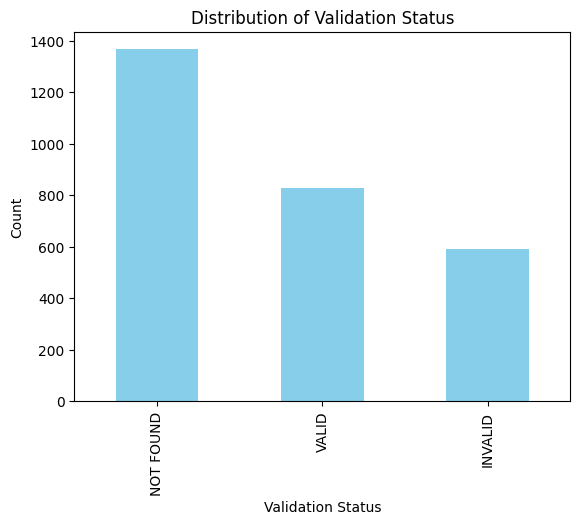

In [77]:
print('BAR CHART TO VISUALIZE THE DISTRIBUTION')

esg['Validation Status'].value_counts().plot(
    kind='bar',
    title='Distribution of Validation Status',
    ylabel='Count',  # Sets the y-axis label
    xlabel='Validation Status',  # Sets the x-axis label
    color='skyblue'
)

In [78]:
print('PROBLEM 2 - Collector analysis:')
print('1.) Number of valid datapoints per collector:')

# filtering the dataset to work only with valid data
datavalid=esg[ esg['Validation Status']=='VALID' ]
datavalid.head()

# pivot table that groups by each analyst and counts the number of times the 'VALID' validation status occurred
validpercol=datavalid.groupby('Analyst Code').agg( {'Validation Status':'count'} )
validpercol.reset_index(inplace=True)
validpercol.columns=['Analyst Code','Number of valid datapoints collected']

# sorting from the analyst that collected the most valid datapoints to the least
validpercol.sort_values(by='Number of valid datapoints collected', inplace=True, ascending=False)
validpercol

PROBLEM 2 - Collector analysis:
1.) Number of valid datapoints per collector:


,Analyst Code,Number of valid datapoints collected
5,REP3,286
6,REP4,142
0,REP1,141
8,REP7,87
3,REP12,73
7,REP6,52
9,REP9,33
1,REP10,9
2,REP11,3
4,REP2,2


In [79]:
print('PROBLEM 2 - Collector analysis:')
print('2.) Overall average data points collected per collector:')

# finding the total number of analysts in a dataset
number_collectors=esg['Analyst Code'].nunique()
print('There are {} analysts in this dataset in total.'.format( number_collectors))

# when the Validation Status is NOT FOUND, the Value == -99, and it means that the data point was not found
not_found_datapoints=esg['Value'].value_counts().get('-99',0)
# 1366 not collected data points

# total number of found data points collected in this dataset
collected_data=esg[ esg['Value'] != '-99'] 
datapoints=collected_data['Value'].count()

print('The total number of found datapoints collected in this dataset is {}.'.format(datapoints))
average_data_coll=datapoints/10

print('The average overall data points collected per analyst is {}.'.format(average_data_coll) )

PROBLEM 2 - Collector analysis:
2.) Overall average data points collected per collector:
There are 10 analysts in this dataset in total.
The total number of found datapoints collected in this dataset is 1421.
The average overall data points collected per analyst is 142.1.


In [80]:
print('PROBLEM 2 - Collector analysis:')
print('3.) Average data points collected per collector per day:')

# We need to know:
# 1. Total data points found and collected per analyst
# 2. Number of days each analyst worked & found data points

collected_data.head() # the dataset with found data points collected, the one we need for the analysis

# number of unique days each analyst found data points:
analystday=collected_data.groupby('Analyst Code').agg({'Analyst Date':'nunique'})
analystday.reset_index(inplace=True)
analystday.sort_values(by='Analyst Date', ascending=False, inplace=True)
analystday.columns=['Analyst Code','Number of days each analyst collected data']

analystdata=collected_data.groupby('Analyst Code').agg({'Row count':'sum'})
analystdata.reset_index(inplace=True)
analystdata.columns=['Analyst Code','Total number of data points found']
analystdata.sort_values(by='Total number of data points found', ascending=False, inplace=True)


datas=pd.merge( left=analystday, right=analystdata, left_on='Analyst Code', right_on='Analyst Code', how='outer')
datas['Average data points per day per analyst']=(datas['Total number of data points found'] / datas['Number of days each analyst collected data']).round(
    decimals=0)
datas.sort_values(by='Average data points per day per analyst', ascending=False, inplace=True)
datas

PROBLEM 2 - Collector analysis:
3.) Average data points collected per collector per day:


,Analyst Code,Number of days each analyst collected data,Total number of data points found,Average data points per day per analyst
5,REP3,26,506,19.0
0,REP1,9,142,16.0
6,REP4,19,310,16.0
8,REP7,11,145,13.0
7,REP6,10,106,11.0
3,REP12,13,135,10.0
4,REP2,2,20,10.0
1,REP10,1,9,9.0
2,REP11,2,14,7.0
9,REP9,5,34,7.0


In [81]:
print(collected_data.head())

analystday=esg.groupby('Analyst Code').agg({'Analyst Date':'nunique'})
analystday.reset_index(inplace=True)
analystday.sort_values(by='Analyst Date', ascending=False, inplace=True)

analystday.columns=['Analyst Code','Number of days each analyst collected data']
print('This is the total number of days per analyst that the analyst tried collecting data')
print('__________________________________________________________________')
print(analystday)

  Organization Name                     Metric  Year   Value  Unit  \
0         Company 0                WASTE_TOTAL  2020  1293.2  tons   
1         Company 0              CO2_EMISSIONS  2020    8558  tons   
2         Company 0  EMISSION_REDUCTION_TARGET  2020     yes     -   
3         Company 1                WASTE_TOTAL  2020     3.2  tons   
4         Company 1              CO2_EMISSIONS  2020   23456  tons   

  Analyst Code Analyst Date Validation Status  Row count  
0         REP3   04/01/2021             VALID          1  
1         REP4   04/11/2021             VALID          1  
2        REP12   04/20/2021             VALID          1  
3         REP3   04/01/2021             VALID          1  
4         REP4   04/11/2021             VALID          1  
This is the total number of days per analyst that the analyst tried collecting data
__________________________________________________________________
  Analyst Code  Number of days each analyst collected data
5         REP3 

In [82]:
print('PROBLEM 3 - Metric Analysis:')
print('1.) Number of valid and invalid datapoints per metric')

valid=esg[ esg['Validation Status']=='VALID'] 
invalid=esg[ esg['Validation Status']=='INVALID']

valid['Validation Status'].value_counts()
invalid['Validation Status'].value_counts()

valid_metric=valid.groupby('Metric').agg( {'Validation Status':'count'} )
valid_metric.reset_index(inplace=True)

valid_metric.columns=['Metric','Valid data points']
valid_metric.sort_values(by='Valid data points', ascending=False, inplace=True)

# SAME FOR INVALID DATA POINTS 

invalid_metric=invalid.groupby('Metric').agg( {'Validation Status':'count'} )
invalid_metric.reset_index(inplace=True)

invalid_metric.columns=['Metric','Invalid data points']
invalid_metric.sort_values(by='Invalid data points', ascending=False, inplace=True)

validity=pd.merge(left=valid_metric, right=invalid_metric, 
                  left_on='Metric', right_on='Metric', how='outer')

validity

PROBLEM 3 - Metric Analysis:
1.) Number of valid and invalid datapoints per metric


,Metric,Valid data points,Invalid data points
0,CO2_EMISSIONS,108,77
1,EMISSION_REDUCTION_TARGET,355,241
2,WASTE_TOTAL,365,275


In [83]:
print('PROBLEM 4 - Company Analysis:')
print('1.) Number of companies where all data points are NOT FOUND:')
esg.head()

notfound=esg[ esg['Validation Status']=='NOT FOUND']
notfound.head()

# for each firm we want to see the number of unique metric not found (there are max 3 metrics researched per firm)
data1=notfound.groupby('Organization Name').agg( {'Metric':'nunique'} )
data1.reset_index(inplace=True)
data1.columns=['Company Name','Number of Metrics that are NOT FOUND']

# firms for which all metrics were not found
allnotfound=data1[ data1['Number of Metrics that are NOT FOUND']==3 ]
allnotfound['Company Name'].value_counts().values # to check that there is no repeating firms

print(allnotfound.head())


PROBLEM 4 - Company Analysis:
1.) Number of companies where all data points are NOT FOUND:
   Company Name  Number of Metrics that are NOT FOUND
43  Company 156                                     3
44  Company 157                                     3
45  Company 158                                     3
46  Company 159                                     3
48  Company 160                                     3


In [84]:
firms_all_not_found=allnotfound['Company Name'].count()
firms_all_not_found

np.int64(74)

In [87]:
print('PROBLEM 4 - Company Analysis:')
print('1.) Number of companies where all data points are VALID:')
esg.head()

valid=esg[ esg['Validation Status']=='VALID']
valid.head()

# for each firm we want to see the number of unique metric not found (there are max 3 metrics researched per firm)
data2=valid.groupby('Organization Name').agg( {'Metric':'nunique'} )
data2.reset_index(inplace=True)
data2.columns=['Company Name','Number of Metrics that are VALID']

# firms for which all metrics were not found
allvalid=data2[ data2['Number of Metrics that are VALID']==3 ]
allvalid['Company Name'].value_counts().values # to check that there is no repeating firms
allvalid.head()

PROBLEM 4 - Company Analysis:
1.) Number of companies where all data points are VALID:


,Company Name,Number of Metrics that are VALID
0,Company 0,3
1,Company 1,3
3,Company 101,3
4,Company 102,3
7,Company 105,3


In [90]:
firms_all_found=allvalid['Company Name'].count()
print(firms_all_found)

25


In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
%matplotlib inline

In [2]:
d1=pd.read_csv("C:/Users/dishi/OneDrive/Desktop/PYTHON DATASETS/p1.csv")
d1.head()

,Date,New York,London,Tokyo,Madrid,Sydney
0,01/06/2024,25,18,27,30,15
1,02/06/2024,26,17,28,31,16
2,03/06/2024,24,19,29,32,15
3,04/06/2024,23,20,30,33,14
4,05/06/2024,22,21,31,34,13


In [8]:
splits=d1['Date'].str.split( pat='/', expand=True) 
d1['index']=splits[0]
d1.head()

,Date,New York,London,Tokyo,Madrid,Sydney,index
0,01/06/2024,25,18,27,30,15,01
1,02/06/2024,26,17,28,31,16,02
2,03/06/2024,24,19,29,32,15,03
3,04/06/2024,23,20,30,33,14,04
4,05/06/2024,22,21,31,34,13,05


In [10]:
d1=d1.drop(labels='Date', axis=1)
d1.head(2)

,New York,London,Tokyo,Madrid,Sydney,index
0,25,18,27,30,15,01
1,26,17,28,31,16,02


In [11]:
d1melted=d1.melt( id_vars='index', value_name='climate', var_name='city')
d1melted.head()

,index,city,climate
0,01,New York,25
1,02,New York,26
2,03,New York,24
3,04,New York,23
4,05,New York,22


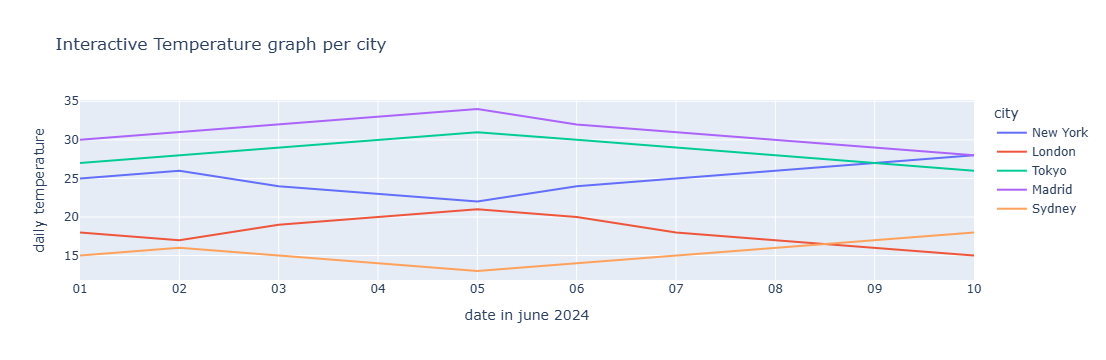

In [12]:
fig1=px.line( d1melted, color='city', x='index', y='climate', labels={'index':'date in june 2024',
                                                                      'climate':'daily temperature'}, 
             title='Interactive Temperature graph per city')
fig1.show()

In [14]:
d2=pd.read_csv("C:/Users/dishi/OneDrive/Desktop/PYTHON DATASETS/p2.csv")
d2.head()

,Country,ISO_Code,GDP_2018,GDP_2019,GDP_2020,GDP_2021,GDP_2022
0,United States,USA,62641,65112,63543,69834,74306
1,Germany,DEU,48553,50206,46934,51628,55305
2,India,IND,2009,2100,1900,2277,2522
3,China,CHN,9770,10261,10410,12556,12971
4,Brazil,BRA,9210,8950,6820,7511,8229


In [21]:
gdps=d2.iloc[:,2:]
mean=gdps.mean(axis=1)
mean.head() # this is the average gdp per nation from 2018 to 2022
d2['Mean GDP']=mean
d2.head()

,Country,ISO_Code,GDP_2018,GDP_2019,GDP_2020,GDP_2021,GDP_2022,Mean gdp,Mean GDP
0,United States,USA,62641,65112,63543,69834,74306,67087.2,67087.2
1,Germany,DEU,48553,50206,46934,51628,55305,50525.2,50525.2
2,India,IND,2009,2100,1900,2277,2522,2161.6,2161.6
3,China,CHN,9770,10261,10410,12556,12971,11193.6,11193.6
4,Brazil,BRA,9210,8950,6820,7511,8229,8144.0,8144.0


In [23]:
plot1=d2.loc[:,['Country','ISO_Code','Mean GDP']]
plot1.tail(1)

,Country,ISO_Code,Mean GDP
9,Canada,CAN,49250.0


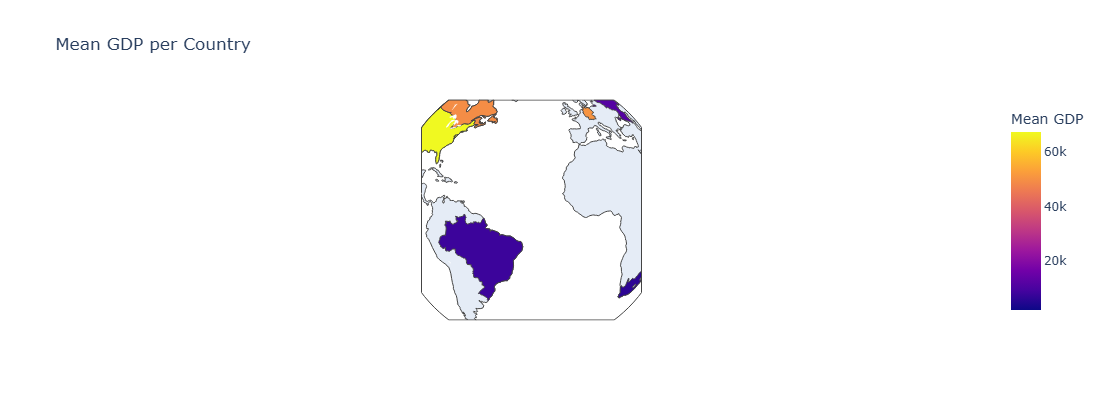

In [30]:
fig3=px.choropleth( plot1, locations='ISO_Code', hover_name='Country', color='Mean GDP', 
                   projection='orthographic', color_continuous_scale='Plasma', title='Mean GDP per Country')
fig3.update_layout( height=400, 
                   width=800)
fig3.show()